## ProjF5 - Final Model

Use this document as a template to provide the evaluation of your final model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [2]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directory and parameters
data_dir = "C:/Users/pranj/Downloads/dataset/plantvillage dataset/color"
batch_size = 32
img_height = 128
img_width = 128
validation_split = 0.2

# Use ImageDataGenerator for loading and augmenting the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


### 2. Prepare your Final Model

Here you can have your code to either train (e.g., if you are building it from scratch) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


d:\Work\projects\AutoencodersExp\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,542 (12.62 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

### 3. Model Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

Epoch 1/100


d:\Work\projects\AutoencodersExp\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 275s 201ms/step - accuracy: 0.4173 - loss: 2.1524 - val_accuracy: 0.7160 - val_loss: 0.9215
Epoch 2/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 163s 120ms/step - accuracy: 0.7424 - loss: 0.8264 - val_accuracy: 0.7926 - val_loss: 0.6566
Epoch 3/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 165s 121ms/step - accuracy: 0.8116 - loss: 0.6032 - val_accuracy: 0.8266 - val_loss: 0.5470
Epoch 4/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 165s 121ms/step - accuracy: 0.8520 - loss: 0.4661 - val_accuracy: 0.8540 - val_loss: 0.4549
Epoch 5/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 165s 121ms/step - accuracy: 0.8740 - loss: 0.3921 - val_accuracy: 0.8869 - val_loss: 0.3527
Epoch 6/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 156s 114ms/step - accuracy: 0.8860 - loss: 0.3461 - val_accuracy: 0.8999 - val_loss: 0.3044
Epoch 7/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 152s 112ms/step - accuracy: 0.9023 - loss: 0.2963 - val_accuracy: 0.9090 - val_loss: 0.2742
Epoch 8/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 151s 111ms/step - accura

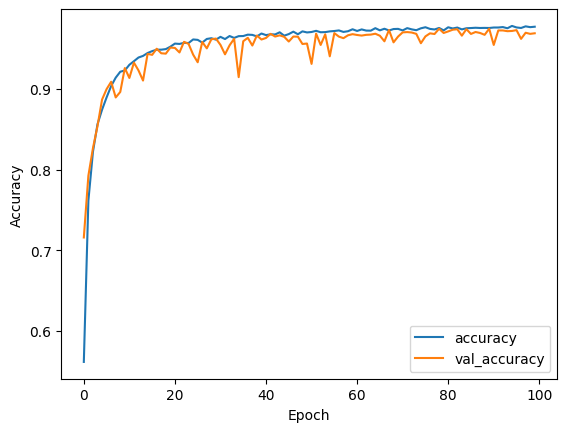

In [4]:
# Train the model
epochs = 100
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


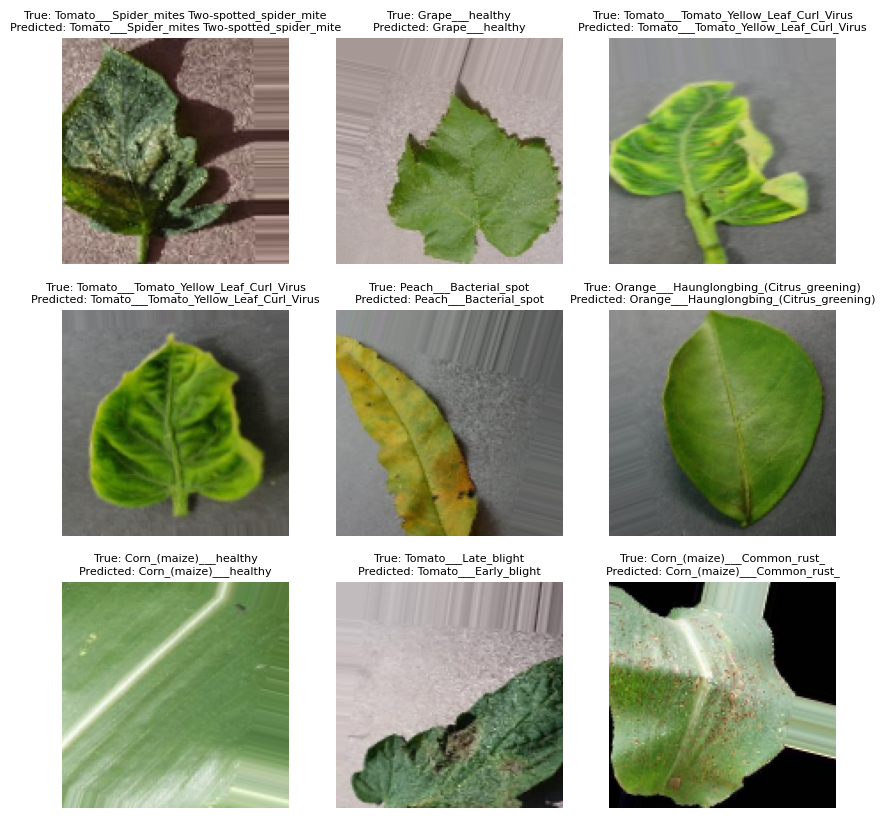

In [11]:
# Predict labels for a batch of images from the test set
sample_images, sample_labels = next(validation_generator)
predicted_labels = loaded_model.predict(sample_images)

# Print images and predicted labels with reduced font size
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    true_label = list(train_generator.class_indices.keys())[np.argmax(sample_labels[i])]
    predicted_label = list(train_generator.class_indices.keys())[np.argmax(predicted_labels[i])]
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}', fontsize=8)
    plt.axis('off')
plt.show()